In [23]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="CODE"></form>''')

In [60]:
# Importing the libraries:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import sqlite3 
import numpy as np 
import glob
import nibabel as ni 
from skimage import measure
import scipy.misc as misc 
from nibabel import nifti1 
import dtimp as dtimp 
import functions_will as FW
import ia636 as ia
import ia870 as MM 
import sys

# Corpus callosum diffusion properties differences in systemic lupus patients

`Mariana Eugênia de Carvalho Pereira - IA369Z`


## Abstract
Corpus Callosum (CC) is the largest white matter structure and it plays a crucial role in clinical and research studies due to its shape and volume correlation to subject's characteristics and neurodegenerative diseases. CC segmentation and parcellation are an important step for any medical and research study. To date, magnetic resonance imaging (MRI) is the main tool for evaluate and infer informations about the brain's microstructure because it offers a better tissue contrast.
Systemic lupus erythematosus, referred to as SLE or lupus, is a chronic disease that causes systemic inflammation which affects multiple organs. As the central nervous system (CNS) is frequently affected in patients with SLE, several studies have sought a relationship between cerebral and corpus callosum volumes with SLE patients. In this work, we analyse diffusion properties in CC sub-regions between two groups, controls and patients diagnosed with SLE. 


## 1 - Introduction 

The corpus callosum (CC) is by far the largest fiber bundles in the human brain interconnecting the two cerebral hemispheres with more than 300 million fibers [1]. CC is also the largest white matter structure in the brain, and despite its main functions, several studies have reported its relation to sexual dimorphism [2], handedness [3], and cerebral speech dominance [4]. Other morphometric studies have correlated CC's size in musicians [5] and positive semantic test performance [6]. The importance of CC has grown in the last decades due to its changes in volume associated with neurodegenerative or inflammatory diseases such as Alzheimer's [7] and multiple sclerosis [8]. And also CC seems to be affected by other central nervous system diseases such as epilepsy [9], depression [10], schizophrenia [11], dyslexia [12], and obesity [13]. 

Systemic lupus erythematosus (SLE), also known simply as lupus, is an autoimmune disease with an incidence of between 2.0 and 7.6 per 100,000 per year [14]. Neurologic and psychiatric symptoms vary from headache, mood disorders, and impairment of cognitive function occur in as many as 70\% of patients with SLE [15]. The cause remains unclear and it is believed to involve hormonal, environmental, and genetic factors. Several studies have found a relationship between corpus callosum volume and its association with the disease duration [16]. 

Diffusion MRI makes the study of neuronal fibers and tissues microstructure possible through the diffusion model. Diffusion MRI measures the dephasing of spins of protons in the presence of a spatially-varying magnetic field. The signal attenuation reflects the general mobility of water molecules, depending on temperature, viscosity and presence of large molecules. It also depends on barriers and obstacles imposed by microstructure, cell membranes, myelin sheaths and microtubules [17].

Other MRI modality known as diffusion tensor imaging (DTI) revolutionized the field of white matter mapping. DTI takes advantage of the macroscopic geometrical arrangement of white matter bundles that becomes apparent through diffusion MRI measurements [18]. Due to CC's well-oriented fibers perpendicular to the sagittal plane and its high anisotropy [19], DTI is capable of generating good CC visualization. 

Image segmentation is commonly used for measuring and visualizing the brain’s anatomical structures in MRI images, and to facilitate the analyses, the CC is commonly parceled into smaller portions. Even though manual segmentation is the gold standard, it is subjective, time consuming, and requires specialist knowledge. Which leads to low repeatability for large number of patients. Automatic segmentation turns out to be a resonable solution, although there are several limitations due to DTI images and CC shape variability among subjects [20]. The partitioning of CC has been an object of interest for radiologic assessment. The first approach was carried out by Witelson in 1989 and was originated from non-human primates [20]. Several posterior studies rely on Witelson's classification such as the method proposed by Hofer [1]. 

###  1.1 - Reproducible Objective Quantification Scheme (ROQS)

ROQS is a semi-automated segmentation process that requires four steps to segment white matter structures. A manual identification of the anatomical structure should be done and a seed placement is the first step towards the segmentation process. Secondly, the determination of of thresholds and selection criteria. The third step is to create a binary mask and the last step is to calculate the boundary of the structure of interest. 

Based on the fact that mostly white matter scructures of the brain have their axis of greatest diffusivity oriented predominantly along one of the three cardinal directions, the first calculation of the ROQS algorithm is to determine the x, y, and z componentes of the principal eigenvector of the seed pixel, where the principal eigenvector denotes de direction of maximal diffusivity [16]. Restricting the selection to pixels with the same maximum components of the principal eigenvector as the seed pixel is the first criteria. The next step is the calculation of the magnification array: 


$$ MagnificationArray = \frac{\text{FA}-\max(\text{FA})*\alpha}{\max(\text{FA})*\beta}+\gamma $$

Where $\alpha$, $\beta$ e $\gamma$ are constants previously defined empirically by the author. The pixels whose anisotropy value is close to the seed's value are selected and then finally pixels are restricted to those with the maximum component value greater than the maximum component of the seed pixel minus 0.2. This threshold dependent on the seed, as opposed to a constant value, is used to adjust for variations in MR scanners and variations in diffusion properties in various areas of the brain. A value of 0.2 is chosen because diffusion properties within major white matter tracts are slightly heterogeneous [16]. The third step is the creation of a binary mask, where pixels that fit the previous criteria are assigned a value of one and all others are assigned a value of zero. Finally, the last step in ROQS is to determine the boundary of the CC by connecting all boundary pixels assigned with value of one, but have an adjacent zero valued pixel.



### 1.2 - Witelson's Parcellation Method

The Witelson's Partitioning defines five callosal regions based on dividing the CC along its anterior-posterior dimension [18]. The CC is subdivided into regions comprising the anterior third, the anterior and posterior midbody, the posterior third, and the posterior one-fifth. Compartments of the anterior third, including the rostrum, genu, and rostral body, are assigned to prefrontal, premotor, and supplementary motor cortical areas. Fibers originating in the motor cortex are assumed to cross the CC through the anterior midbody, whereas somaesthetic and posterior parietal fiber bundles cross the CC through the posterior midbody. Compartments of the posterior third, including the isthmus and splenium, are assigned to temporal, parietal, and occipital cortical regions. It should be noted, however, that neither Witelson's classification nor other geometric partitioning schemes exactly mirror the texture of the
CC at the cellular level [1].

### 1.3 - Hofer and Frahm's Parcellation Method

The Hofer and Frahm parcellation method incorporates a geometric representation of the five subregions of the CC based on diffusion imaging fiber tractography. A geometric baseline was defined in the midsagittal section of the CC and connected the anterior and posterior points of the structure. After fiber tracking, the CC regions crossed by fibers belonging to defined cortical areas provided a natural segmentation [1]. These maximum segments were used as border lines and projected the baseline.  The callosal parietal, temporal, and occipital fiber bundles overlapped and could not be separated by vertical lines. They constitute the most posterior region of the CC. The figure below shows an example of the difference between Witelson's (top) and Hofer and Frahm (bottom) parcellation methods:

<img src="WandHschemes.png">

## 2 - Methodology

### 2.1 - Subjects and Image Acquisition

For experiments, DWI from 14 subjects at the University of Campinas, were acquired on a Philips scanner Achieva 3T in the axial plane with a $1x1mm$ spatial resolution and $2mm$ slice thickness, along $32$ directions ($b-value=1000s/mm^2$, $TR=8.5s$, and $TE=61ms$). All data used in this experiment was acquired through a project approved by the research ethics committee from the School of Medicine at UNICAMP. From each acquired DWI volume, only the midsaggital slice was used.
 

### 2.2 - Workflow

The dataset is composed by 3 controls and 6 patients diagnosed with SLE. The DWI input data from each subject followed the process above:

<img src="WorkFlow_Done.png">

### 2.3 - Segmentation and Parcellation

The dataset is composed by 3 controls and 6 patients diagnosed with SLE. The corpus callosum of each subject was segmented using the ROQS method and parcellated using two different methods, Witelson and Hofer and Frahm. 

#### Segmentation:

In [61]:
# Defining the functions we will use to segment and parcelate:
def run_analysis(rootdir):  

    eigvals, eigvects, T3 = dtimp.loadNiftiDTI(rootdir, reorient=True)

    FA,MD = dtimp.getFractionalAnisotropy(eigvals)
    FA[np.isnan(FA)] = 0
    FA[FA>1] = 1

    fissure, FA_mean = dtimp.getFissureSlice(eigvals, FA)

    wFA = FA*abs(eigvects[0,0]) #weighted FA
    
    return wFA, FA, MD, fissure, eigvals, eigvects

def corpusCallosumParcellationGeometric (segmentation, scheme = 'HOFER'):
    
    SCHEMES = ['HOFER', 'WITELSON']
    scheme = scheme.upper()
    if not scheme in SCHEMES:
        raise Exception('Unknown scheme!')

    def coef_linear (a, p):
        return p[0]-a*p[1] 

    def predicty(x, a, b):
        return a*x + b

    def predictx(y, a, b):
        return (y-b)/a

    # Base and normal vectors 
    M,N = np.nonzero(segmentation)
    minN = np.min(N)
    maxN = np.max(N)
    minM = segmentation[:,minN].nonzero()[0].mean()
    maxM = segmentation[:,maxN].nonzero()[0].mean()
    p1 = np.array([minM, minN])
    p2 = np.array([maxM, maxN])

    base_v = p2 - p1
    base_length = np.sqrt((base_v**2).sum())
    base_v = base_v / np.sqrt((base_v**2).sum())
    cut_v = np.array([-base_v[1], base_v[0]])

    # Line's coefficients
    hofer = np.array([1.0/6, 1.0/2, 2.0/3, 3.0/4]).reshape(4,1)
    witelson = np.array([1.0/3, 1.0/2, 2.0/3, 4.0/5]).reshape(4,1)

    if scheme == 'HOFER':
        P = p1 + hofer*base_length*base_v

    if scheme == 'WITELSON':
        P = p1 + witelson*base_length*base_v

    p3, p4, p5, p6 = P

    rbase_A = base_v[0]/base_v[1]
    rbase_B = p1[0]-rbase_A*p1[1]
    rA = cut_v[0]/cut_v[1]
    r3B = coef_linear(rA, p3)
    r4B = coef_linear(rA, p4)
    r5B = coef_linear(rA, p5)
    r6B = coef_linear(rA, p6)

    # Rotulating the mask    
    H,W = np.shape(segmentation)
    Parcellation = np.zeros((H,W), dtype='int')

    y,x = segmentation.nonzero()
    labels = np.zeros(y.size, dtype='int')
    above_base = y <= predicty(x, rbase_A, rbase_B)
    left_r3 = x <= predictx(y, rA, r3B)
    left_r4 = x <= predictx(y, rA, r4B)
    left_r5 = x <= predictx(y, rA, r5B)
    left_r6 = x <= predictx(y, rA, r6B)

    labels[np.logical_and(left_r3==False, left_r4)] = 2
    labels[np.logical_and(left_r4==False, left_r5)] = 3
    labels[np.logical_and(left_r5==False, left_r6)] = 4
    labels[np.logical_or(np.logical_and(above_base==False, left_r4), left_r3)] = 1
    labels[np.logical_or(np.logical_and(above_base==False, left_r5==False), left_r6==False)] = 5

    Parcellation[segmentation] = labels
    return Parcellation 

In [ ]:
# Defining the path: 
dir_bas = "/Users/mariecp/DTI_IA369/candidates"
dirs = glob.glob(dir_bas+"/*C*")

acumC = np.zeros((3,6,4))
acumC2 = np.zeros((3,6,4))
indx = 0 

for candidate in dirs: 

    wFA, FA, MD, fissure, eigvals, eigvects = run_analysis(candidate)
    escala = [3*FA[fissure,:,:].shape[-2],2*FA[fissure,:,:].shape[-1]]
    wFA_ms = wFA[fissure,:,:]
    eigvects_ms = abs(eigvects[0,:,fissure]) 

    wFA_ss = np.load(candidate+'/segmentacao/wFA_ss.npy').astype(np.bool)
    escala = [wFA_ss.shape[-2],wFA_ss.shape[-1]]
    teste = mpimg.imread(candidate+'/mask_AF.png')[:,:,0]
    mask_p3 = np.array(teste).astype(np.bool)
    mask_sem = misc.imresize(mask_p3,escala).astype(bool)
    con_mask_cc = np.logical_xor(MM.iaero(mask_sem),mask_sem)
    
    # ROQS code:
    seg_mask_seed_ero = MM.iaero(mask_sem)
    ar_cc = np.sum(seg_mask_seed_ero)
    in_random = np.random.randint(ar_cc)
    seed = [np.nonzero(seg_mask_seed_ero)[0][in_random],np.nonzero(seg_mask_seed_ero)[1][in_random]]


    max_comp_in = np.argmax(eigvects_ms[:,seed[0],seed[1]],axis=0)
    max_comp_in = np.argmax(ia.iahistogram(max_comp_in))
    Cmax_seed = eigvects_ms[max_comp_in,seed[0],seed[1]]

    princ = np.argmax(eigvects_ms,axis=0)
    fsc = princ == max_comp_in

    alpha = 0.3
    beta = 0.3
    gamma = 0.5
    FA_ms = FA[fissure]
    MA = (FA_ms-np.amax(FA_ms)*alpha)/(np.amax(FA_ms)*beta)+gamma
    ssc = np.clip(np.amax(eigvects_ms*MA,axis=0),0,1)
    ssc = ssc*fsc
    mask_cc = ssc > Cmax_seed-0.1
    fr = MM.ialabel(mask_cc)
    fra = MM.iablob(fr,'area')
    mask_cc = fra == np.unique(fra)[-1]
    np.save(candidate+'/segmentacao/mask_ROQS', mask_cc)
    segmentation = mask_cc # Saving the segmentation mask 

    # Parcelattion code:
    Ts = np.array([[4.0,0,0],[0,4,0],[0,0,1]])
    t = 0.2
    wFA_slice = wFA[fissure]
    FA_slice = FA[fissure]
    MD_slice = MD[fissure]
    fc = 8.0
    Ts = np.array([[fc,0,0],[0,fc,0],[0,0,1]])

    #Hofer and Frahm code:
    scheme = 'HOFER'
    geometricw = corpusCallosumParcellationGeometric(segmentation, scheme)

    # If you would like to see the segmentation and parcellation images, discomment the lines below:
    hofer = geometricw

    labels = geometricw.max(axis=0)
    labels = labels[labels[:-1]!=labels[1:]][1:].copy()    
    measuresw = []
    measuresw.append([FA_slice[segmentation].mean(), FA_slice[segmentation].std(), MD_slice[segmentation].mean(), MD_slice[segmentation].std()])
    for l in labels:
        selection = (geometricw==l)
        measuresw.append([FA_slice[selection].mean(), FA_slice[selection].std(), MD_slice[selection].mean(), MD_slice[selection].std()])
    measuresw = np.array(measuresw)

    acumC[indx] = measuresw
    

    #Witelson code:
    scheme = 'WITELSON'
    geometricw = corpusCallosumParcellationGeometric(segmentation, scheme)
    

    labels = geometricw.max(axis=0)
    labels = labels[labels[:-1]!=labels[1:]][1:].copy()    
    measuresw = []
    measuresw.append([FA_slice[segmentation].mean(), FA_slice[segmentation].std(), MD_slice[segmentation].mean(), MD_slice[segmentation].std()])
    for l in labels:
        selection = (geometricw==l)
        measuresw.append([FA_slice[selection].mean(), FA_slice[selection].std(), MD_slice[selection].mean(), MD_slice[selection].std()])
    measuresw = np.array(measuresw)
  
    acumC2[indx] = measuresw
    indx += 1  

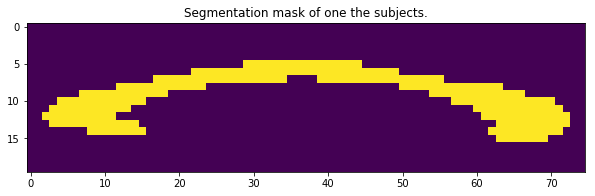

In [63]:
plt.figure(figsize=(10,10))
plt.imshow(ia.ianormalize(segmentation[20:40,90:165]))
plt.title('Segmentation mask of one the subjects.')

#### Hofer and Frahm Parcellation:

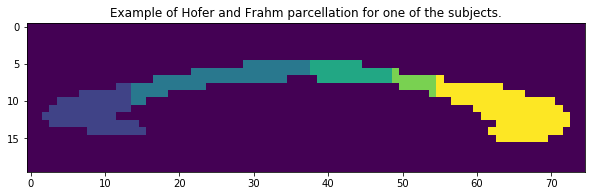

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(ia.ianormalize(hofer[20:40,90:165]))
plt.title('Example of Hofer and Frahm parcellation for one of the subjects.')

#### Witelson Parcellation:

In [ ]:
# Defining the path: 
dir_bas = "/Users/mariecp/DTI_IA369/candidates"
dirs = glob.glob(dir_bas+"/*P*")

acumP = np.zeros((6,6,4))
acumP2 = np.zeros((6,6,4))
indx = 0 

for candidate in dirs: 

    wFA, FA, MD, fissure, eigvals, eigvects = run_analysis(candidate)
    escala = [3*FA[fissure,:,:].shape[-2],2*FA[fissure,:,:].shape[-1]]
    wFA_ms = wFA[fissure,:,:]
    eigvects_ms = abs(eigvects[0,:,fissure]) 

    wFA_ss = np.load(candidate+'/segmentacao/wFA_ss.npy').astype(np.bool)
    escala = [wFA_ss.shape[-2],wFA_ss.shape[-1]]
    teste = mpimg.imread(candidate+'/mask_AF.png')[:,:,0]
    mask_p3 = np.array(teste).astype(np.bool)
    mask_sem = misc.imresize(mask_p3,escala).astype(bool)
    con_mask_cc = np.logical_xor(MM.iaero(mask_sem),mask_sem)
    
    # ROQS code:
    seg_mask_seed_ero = MM.iaero(mask_sem)
    ar_cc = np.sum(seg_mask_seed_ero)
    in_random = np.random.randint(ar_cc)
    seed = [np.nonzero(seg_mask_seed_ero)[0][in_random],np.nonzero(seg_mask_seed_ero)[1][in_random]]


    max_comp_in = np.argmax(eigvects_ms[:,seed[0],seed[1]],axis=0)
    max_comp_in = np.argmax(ia.iahistogram(max_comp_in))
    Cmax_seed = eigvects_ms[max_comp_in,seed[0],seed[1]]

    princ = np.argmax(eigvects_ms,axis=0)
    fsc = princ == max_comp_in

    alpha = 0.3
    beta = 0.3
    gamma = 0.5
    FA_ms = FA[fissure]
    MA = (FA_ms-np.amax(FA_ms)*alpha)/(np.amax(FA_ms)*beta)+gamma
    ssc = np.clip(np.amax(eigvects_ms*MA,axis=0),0,1)
    ssc = ssc*fsc
    mask_cc = ssc > Cmax_seed-0.1
    fr = MM.ialabel(mask_cc)
    fra = MM.iablob(fr,'area')
    mask_cc = fra == np.unique(fra)[-1]
    np.save(candidate+'/segmentacao/mask_ROQS', mask_cc)
    segmentation = mask_cc # Saving the segmentation mask 

    # Parcelattion code:
    Ts = np.array([[4.0,0,0],[0,4,0],[0,0,1]])
    t = 0.2
    wFA_slice = wFA[fissure]
    FA_slice = FA[fissure]
    MD_slice = MD[fissure]
    fc = 8.0
    Ts = np.array([[fc,0,0],[0,fc,0],[0,0,1]])

    #Hofer and Frahm code:
    scheme = 'HOFER'
    geometricw = corpusCallosumParcellationGeometric(segmentation, scheme)

    # If you would like to see the segmentation and parcellation images, discomment the lines below:
    
    #plt.figure(figsize=(10,10))
    #plt.imshow(ia.ianormalize(segmentation))
    #plt.figure(2)
    #plt.figure(figsize=(10,10))
    #plt.imshow(ia.ianormalize(geometricw))

    labels = geometricw.max(axis=0)
    labels = labels[labels[:-1]!=labels[1:]][1:].copy()    
    measuresw = []
    measuresw.append([FA_slice[segmentation].mean(), FA_slice[segmentation].std(), MD_slice[segmentation].mean(), MD_slice[segmentation].std()])
    for l in labels:
        selection = (geometricw==l)
        measuresw.append([FA_slice[selection].mean(), FA_slice[selection].std(), MD_slice[selection].mean(), MD_slice[selection].std()])
    measuresw = np.array(measuresw)

    acumP[indx] = measuresw
    

    #Witelson code:
    scheme = 'WITELSON'
    geometricw = corpusCallosumParcellationGeometric(segmentation, scheme)

    # If you would like to see the segmentation and parcellation images, discomment the lines below:
    
    #plt.figure(figsize=(10,10))
    #plt.imshow(ia.ianormalize(segmentation))
    #plt.figure(2)
    #plt.figure(figsize=(10,10))
    #plt.imshow(ia.ianormalize(geometricw))

    labels = geometricw.max(axis=0)
    labels = labels[labels[:-1]!=labels[1:]][1:].copy()    
    measuresw = []
    measuresw.append([FA_slice[segmentation].mean(), FA_slice[segmentation].std(), MD_slice[segmentation].mean(), MD_slice[segmentation].std()])
    for l in labels:
        selection = (geometricw==l)
        measuresw.append([FA_slice[selection].mean(), FA_slice[selection].std(), MD_slice[selection].mean(), MD_slice[selection].std()])
    measuresw = np.array(measuresw)
    
    acumP2[indx] = measuresw
    indx += 1

- Controls: 

In [66]:
# Calculating the average for all controls:
auxcumC = np.average(acumC,axis=0)
auxcumC2 = np.average(acumC2,axis=0)

print '====================================================='
print '           Hofer and Frahm Parcellation '
print '====================================================='
print '           FA (mean)   FA (std)  MD (mean)  MD (std)'
print('Corpus : %.3e, %.3e, %.3e, %.3e' %(auxcumC[0,0], auxcumC[0,1],auxcumC[0,2],auxcumC[0,3]))
print('Slice 1: %.3e, %.3e, %.3e, %.3e' %(auxcumC[1,0], auxcumC[1,1],auxcumC[1,2],auxcumC[1,3]))
print('Slice 2: %.3e, %.3e, %.3e, %.3e' %(auxcumC[2,0], auxcumC[2,1],auxcumC[2,2],auxcumC[2,3]))
print('Slice 3: %.3e, %.3e, %.3e, %.3e' %(auxcumC[3,0], auxcumC[3,1],auxcumC[3,2],auxcumC[3,3]))
print('Slice 4: %.3e, %.3e, %.3e, %.3e' %(auxcumC[4,0], auxcumC[4,1],auxcumC[4,2],auxcumC[4,3]))
print('Slice 5: %.3e, %.3e, %.3e, %.3e' %(auxcumC[5,0], auxcumC[4,1],auxcumC[5,2],auxcumC[5,3]))
print('\n')
print '====================================================='
print '           Witelson Parcellation '
print '====================================================='
print '           FA (mean)   FA (std)  MD (mean)  MD (std)'
print('Corpus : %.3e, %.3e, %.3e, %.3e' %(auxcumC2[0,0], auxcumC2[0,1],auxcumC2[0,2],auxcumC2[0,3]))
print('Slice 1: %.3e, %.3e, %.3e, %.3e' %(auxcumC2[1,0], auxcumC2[1,1],auxcumC2[1,2],auxcumC2[1,3]))
print('Slice 2: %.3e, %.3e, %.3e, %.3e' %(auxcumC2[2,0], auxcumC2[2,1],auxcumC2[2,2],auxcumC2[2,3]))
print('Slice 3: %.3e, %.3e, %.3e, %.3e' %(auxcumC2[3,0], auxcumC2[3,1],auxcumC2[3,2],auxcumC2[3,3]))
print('Slice 4: %.3e, %.3e, %.3e, %.3e' %(auxcumC2[4,0], auxcumC2[4,1],auxcumC2[4,2],auxcumC2[4,3]))
print('Slice 5: %.3e, %.3e, %.3e, %.3e' %(auxcumC2[5,0], auxcumC2[4,1],auxcumC2[5,2],auxcumC2[5,3]))


           Hofer and Frahm Parcellation 
           FA (mean)   FA (std)  MD (mean)  MD (std)
Corpus : 7.241e-01, 1.379e-01, 7.319e-04, 1.683e-04
Slice 1: 7.474e-01, 1.517e-01, 7.535e-04, 1.679e-04
Slice 2: 6.803e-01, 1.268e-01, 6.733e-04, 1.534e-04
Slice 3: 7.034e-01, 1.196e-01, 6.577e-04, 9.540e-05
Slice 4: 6.666e-01, 1.175e-01, 7.815e-04, 1.096e-04
Slice 5: 7.475e-01, 1.175e-01, 7.703e-04, 1.843e-04


           Witelson Parcellation 
           FA (mean)   FA (std)  MD (mean)  MD (std)
Corpus : 7.241e-01, 1.379e-01, 7.319e-04, 1.683e-04
Slice 1: 7.327e-01, 1.440e-01, 7.295e-04, 1.653e-04
Slice 2: 6.603e-01, 1.346e-01, 6.680e-04, 1.579e-04
Slice 3: 7.034e-01, 1.196e-01, 6.577e-04, 9.540e-05
Slice 4: 6.910e-01, 1.230e-01, 7.806e-04, 1.308e-04
Slice 5: 7.506e-01, 1.230e-01, 7.672e-04, 1.830e-04


- Patients:

In [67]:
# Calculating the average for all patients:
auxcumP = np.average(acumP,axis=0)
auxcumP2 = np.average(acumP2,axis=0)

print '====================================================='
print '           Hofer and Frahm Parcellation '
print '====================================================='
print '           FA (mean)   FA (std)  MD (mean)  MD (std)'
print('Corpus : %.3e, %.3e, %.3e, %.3e' %(auxcumP[0,0], auxcumP[0,1],auxcumP[0,2],auxcumP[0,3]))
print('Slice 1: %.3e, %.3e, %.3e, %.3e' %(auxcumP[1,0], auxcumP[1,1],auxcumP[1,2],auxcumP[1,3]))
print('Slice 2: %.3e, %.3e, %.3e, %.3e' %(auxcumP[2,0], auxcumP[2,1],auxcumP[2,2],auxcumP[2,3]))
print('Slice 3: %.3e, %.3e, %.3e, %.3e' %(auxcumP[3,0], auxcumP[3,1],auxcumP[3,2],auxcumP[3,3]))
print('Slice 4: %.3e, %.3e, %.3e, %.3e' %(auxcumP[4,0], auxcumP[4,1],auxcumP[4,2],auxcumP[4,3]))
print('Slice 5: %.3e, %.3e, %.3e, %.3e' %(auxcumP[5,0], auxcumP[4,1],auxcumP[5,2],auxcumP[5,3]))
print('\n')
print '====================================================='
print '           Witelson Parcellation '
print '====================================================='
print '           FA (mean)   FA (std)  MD (mean)  MD (std)'
print('Corpus : %.3e, %.3e, %.3e, %.3e' %(auxcumP2[0,0], auxcumP2[0,1],auxcumP2[0,2],auxcumP2[0,3]))
print('Slice 1: %.3e, %.3e, %.3e, %.3e' %(auxcumP2[1,0], auxcumP2[1,1],auxcumP2[1,2],auxcumP2[1,3]))
print('Slice 2: %.3e, %.3e, %.3e, %.3e' %(auxcumP2[2,0], auxcumP2[2,1],auxcumP2[2,2],auxcumP2[2,3]))
print('Slice 3: %.3e, %.3e, %.3e, %.3e' %(auxcumP2[3,0], auxcumP2[3,1],auxcumP2[3,2],auxcumP2[3,3]))
print('Slice 4: %.3e, %.3e, %.3e, %.3e' %(auxcumP2[4,0], auxcumP2[4,1],auxcumP2[4,2],auxcumP2[4,3]))
print('Slice 5: %.3e, %.3e, %.3e, %.3e' %(auxcumP2[5,0], auxcumP2[4,1],auxcumP2[5,2],auxcumP2[5,3]))


           Hofer and Frahm Parcellation 
           FA (mean)   FA (std)  MD (mean)  MD (std)
Corpus : 6.460e-01, 1.521e-01, 7.785e-04, 3.376e-04
Slice 1: 6.741e-01, 1.439e-01, 7.643e-04, 3.004e-04
Slice 2: 6.172e-01, 1.415e-01, 7.274e-04, 2.826e-04
Slice 3: 6.301e-01, 1.463e-01, 7.565e-04, 3.147e-04
Slice 4: 6.144e-01, 1.435e-01, 8.240e-04, 3.038e-04
Slice 5: 6.512e-01, 1.435e-01, 8.229e-04, 3.747e-04


           Witelson Parcellation 
           FA (mean)   FA (std)  MD (mean)  MD (std)
Corpus : 6.460e-01, 1.521e-01, 7.785e-04, 3.376e-04
Slice 1: 6.592e-01, 1.468e-01, 7.622e-04, 3.002e-04
Slice 2: 6.112e-01, 1.351e-01, 6.968e-04, 2.598e-04
Slice 3: 6.301e-01, 1.463e-01, 7.565e-04, 3.147e-04
Slice 4: 6.187e-01, 1.500e-01, 8.226e-04, 3.280e-04
Slice 5: 6.535e-01, 1.500e-01, 8.238e-04, 3.778e-04


As que could see from the tables above, there is not a significant difference in the diffusion properties between the two groups. We believe this is due to the small size of the subjects aquired. As many studies have reported significant differences in CC volume in lupus we spect to increase the number of subjets for further analyses. 

## 5 - References 

[1] HOFER, Sabine; FRAHM, Jens. Topography of the human corpus callosum revisited—comprehensive fiber tractography using diffusion tensor magnetic resonance imaging. Neuroimage, v. 32, n. 3, p. 989-994, 2006.

[2] WITELSON, S.F., 1989. Hand and sex differences in the isthmus and genu of the human corpus callosum. Brain, 112(3), pp.799-835.

[3] KERR, R. Movement control and maturation in elementary-grade children. Percept. Motor Skills 41, 151-154, 1975.

[4] O'KUSKY, John et al. The corpus callosum is larger with right‐hemisphere cerebral speech dominance. Annals of neurology, v. 24, n. 3, p. 379-383, 1988.

[5] SCHLAUG, Gottfried et al. Increased corpus callosum size in musicians. Neuropsychologia, v. 33, n. 8, p. 1047-1055, 1995.

[6] KOZLOVSKIY, S.A.; Vartanov, A.V.; Pyasik, M.M.; Nikonova, E.Y. (2012). "Functional role of corpus callosum regions in human memory functioning". International Journal of Psychophysiology. 85 (3): 396–7. doi:10.1016/j.ijpsycho.2012.07.092.

[7] GOLD, Brian T. et al. White matter integrity and vulnerability to Alzheimer's disease: preliminary findings and future directions. Biochimica et Biophysica Acta (BBA)-Molecular Basis of Disease, v. 1822, n. 3, p. 416-422, 2012. 

[8] OZTURK, Arzu et al. MRI of the corpus callosum in multiple sclerosis: association with disability. Multiple Sclerosis Journal, v. 16, n. 2, p. 166-177, 2010.

[9] BACHMANN, S. et al. Corpus callosum in first-episode patients with schizophrenia–A magnetic resonance imaging study. Psychological medicine, v. 33, n. 06, p. 1019-1027, 2003.

[10] LACERDA, Acioly LT et al. Anatomical MRI study of corpus callosum in unipolar depression. Journal of psychiatric research, v. 39, n. 4, p. 347-354, 2005.

[11] SAMARTZIS, Lampros et al. White matter alterations in early stages of schizophrenia: a systematic review of diffusion tensor imaging studies. Journal of Neuroimaging, v. 24, n. 2, p. 101-110, 2014.

[12] VON PLESSEN, Kerstin et al. Less developed corpus callosum in dyslexic subjects—a structural MRI study. Neuropsychologia, v. 40, n. 7, p. 1035-1044, 2002.

[13] KULLMANN, S. et al. Compromised white matter integrity in obesity. Obesity Reviews, v. 16, n. 4, p. 273-281, 2015.

[14] JIMÉNES, S., Cervera, R., Font, J. and Ingelmo, M., 2003. The epidemiology of systemic lupus erythematosus. Clinical reviews in allergy & immunology, 25(1), pp.3-11.

[15] MCCUNE, W.J., Macguire, A., Aisen, A. and Gebarski, S., 1988. Identification of brain lesions in neuropsychiatric systemic lupus erythematosus by magnetic resonance scanning. Arthritis & Rheumatology, 31(2), pp.159-166.

[16] APPENZELLER, S., Rondina, J.M., Li, L.M., Costallat, L.T. and Cendes, F., 2005. Cerebral and corpus callosum atrophy in systemic lupus erythematosus. Arthritis & Rheumatology, 52(9), pp.2783-2789.

[17] BASSER, Peter J.; MATTIELLO, James; LEBIHAN, Denis. MR diffusion tensor spectroscopy and imaging. Biophysical journal, v. 66, n. 1, p. 259-267, 1994.

[18] ABOITIZ, Francisco et al. Fiber composition of the human corpus callosum. Brain research, v. 598, n. 1, p. 143-153, 1992.

[19] NIOGI, S.N., Mukherjee, P. and McCandliss, B.D., 2007. Diffusion tensor imaging segmentation of white matter structures using a Reproducible Objective Quantification Scheme (ROQS). Neuroimage, 35(1), pp.166-174.

[20] COVER, G., Herrera, W., Bento, M., e Rittner, L. (2017). Corpus Callosum 2D Segmentation on Diffusion Tensor Imaging using Growing Neural Gas Network. Lecture Notes in Computational Vision and Biomechanics, (Accepted).

[21] KOCHUNOV, P., Lancaster, J., Hardies, J., Thompson, P.M., Woods, R.P., Cody, J.D., Hale, D.E., Laird, A. and Fox, P.T., 2005. Mapping structural differences of the corpus callosum in individuals with 18q deletions using targetless regional spatial normalization. Human brain mapping, 24(4), pp.325-331.
